In [207]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# machine learning

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE


# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [267]:
data = pd.read_csv('electricity.csv')

In [268]:
data.head()

,ID,datetime,temperature,var1,pressure,windspeed,var2,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,-17.1,1003.0,571.910,A,216.0
1,1,2013-07-01 01:00:00,-12.1,-19.3,996.0,575.040,A,210.0
2,2,2013-07-01 02:00:00,-12.9,-20.0,1000.0,578.435,A,225.0
3,3,2013-07-01 03:00:00,-11.4,-17.1,995.0,582.580,A,216.0
4,4,2013-07-01 04:00:00,-11.4,-19.3,1005.0,586.600,A,222.0


In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 8 columns):
ID                         26496 non-null int64
datetime                   26496 non-null object
temperature                26496 non-null float64
var1                       26496 non-null float64
pressure                   26496 non-null float64
windspeed                  26496 non-null float64
var2                       26496 non-null object
electricity_consumption    26496 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.6+ MB


In [270]:
data['datetime'] = pd.to_datetime(data['datetime']) # convert to date time type 

In [271]:
data.shape

(26496, 8)

In [272]:
data.describe(include=['float64'])

,temperature,var1,pressure,windspeed,electricity_consumption
count,26496.000000,26496.000000,26496.000000,26496.000000,26496.000000
mean,5.098989,-1.916233,986.450615,23.959956,298.359601
std,8.682860,10.424860,12.002647,48.280321,108.020555
min,-17.100000,-32.900000,953.000000,1.075000,174.000000
25%,-2.900000,-10.700000,978.000000,3.155000,219.000000
50%,6.400000,-1.400000,986.000000,6.545000,267.000000
75%,12.100000,7.900000,995.000000,22.260000,342.000000
max,23.600000,18.600000,1024.000000,586.600000,1386.000000


In [273]:
data.isna().values.any()

False

In [274]:
data.isnull().values.any()

False

In [275]:
data['year']=data.datetime.dt.year 
data['month']=data.datetime.dt.month 
data['day']=data.datetime.dt.day
data['time']=data.datetime.dt.time

In [276]:
data = data.drop(['datetime'], axis=1)

In [277]:
data.head()

,ID,temperature,var1,pressure,windspeed,var2,electricity_consumption,year,month,day,time
0,0,-11.4,-17.1,1003.0,571.910,A,216.0,2013,7,1,00:00:00
1,1,-12.1,-19.3,996.0,575.040,A,210.0,2013,7,1,01:00:00
2,2,-12.9,-20.0,1000.0,578.435,A,225.0,2013,7,1,02:00:00
3,3,-11.4,-17.1,995.0,582.580,A,216.0,2013,7,1,03:00:00
4,4,-11.4,-19.3,1005.0,586.600,A,222.0,2013,7,1,04:00:00


# <brc>

## Exploratory data analysis

### Distribution of the dataset using Density Plot 

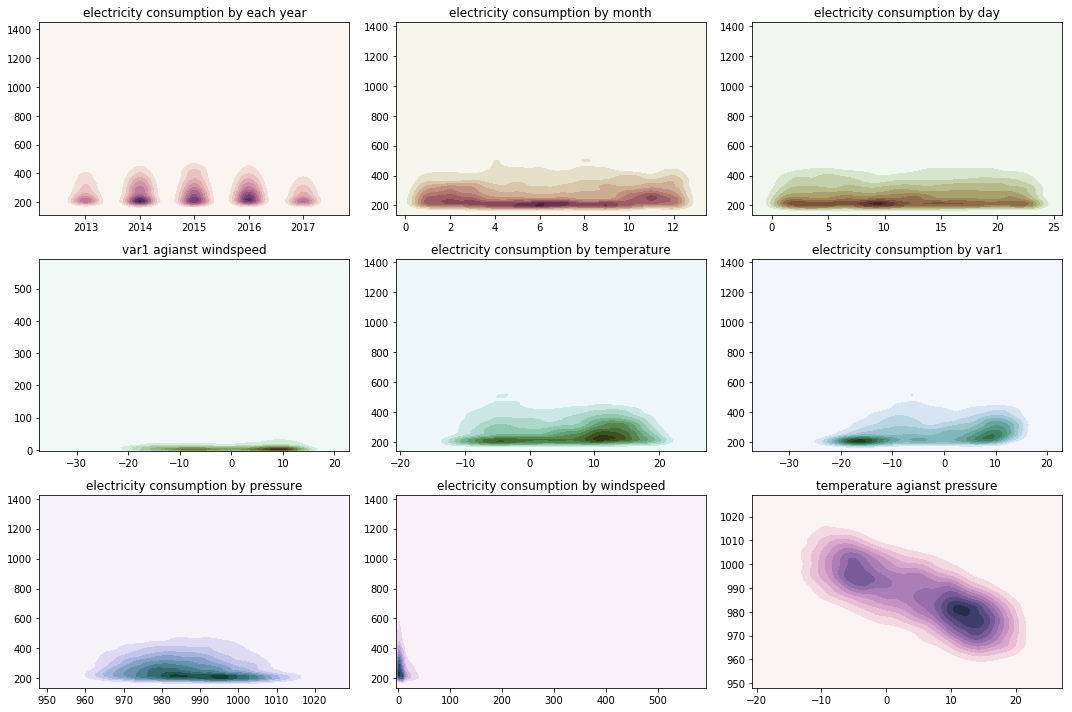

In [45]:
f, axes = plt.subplots(3, 3, figsize=(15, 10), 
                       sharex=False, sharey=False)

# colormap
s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# electricity consumption by each year
x = data['year'].values
y = data['electricity_consumption'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'electricity consumption by each year')

cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)

# electricity consumption by month
x = data['month'].values
y = data['electricity_consumption'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,1])
axes[0,1].set( title = 'electricity consumption by month')

cmap = sns.cubehelix_palette(start=0.666666666667, light=1, as_cmap=True)

# electricity consumption by day
x = data['day'].values
y = data['electricity_consumption'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, ax=axes[0,2])
axes[0,2].set( title = 'electricity consumption by day')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)

# var1 agianst windspeed
x = data['var1'].values
y = data['windspeed'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'var1 agianst windspeed')

cmap = sns.cubehelix_palette(start=1.333333333333, light=1, as_cmap=True)

# electricity consumption by temperature
x = data['temperature'].values
y = data['electricity_consumption'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'electricity consumption by temperature')

cmap = sns.cubehelix_palette(start=1.666666666667, light=1, as_cmap=True)

# electricity consumption by var1
x = data['var1'].values
y = data['electricity_consumption'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,2])
axes[1,2].set( title = 'electricity consumption by var1')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)

# electricity consumption by pressure
x = data['pressure'].values
y = data['electricity_consumption'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,0])
axes[2,0].set( title = 'electricity consumption by pressure')

cmap = sns.cubehelix_palette(start=2.333333333333, light=1, as_cmap=True)

# electricity consumption by windspeed
x = data['windspeed'].values
y = data['electricity_consumption'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,1])
axes[2,1].set( title = 'electricity consumption by windspeed')

cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)

# temperature agianst pressure
x = data['temperature'].values
y = data['pressure'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[2,2])
axes[2,2].set( title = 'temperature agianst pressure')

f.tight_layout()


- The overall data has the information about electricity consumption from 2013 to 2017. 
- The electricity consumption data has the majority of data in the year 2014 to 2016
- 2015 is a year where the electricity consumption is higher comparing to the rest of the years
- The lowest electricity consumption was in the year 2017
- Majority of months has the nearly the same average of consumption. 
- The first two months and last two months of the year have more electricity consumption comparing to the rest of the months.
- The days from 15 to 20 have the lowest consumption comparing to the rest of the days in a month
- The majority of the var1 is relais between windspeed of 10 where the minimum and maximum wind speed are from -20 to +20. 
- The wind speed  level 10 has a higher value of vr1 comparing to rest of the wind speed level
- -5 degree has the highest electricity consumption
- The average temperate level is 10 degree where the majority of data stands between the 8 to 15 degree Celsius temperature
- Low wind speed has the highest reach of electricity  consumption and High windspeed has the low electricity consumption 

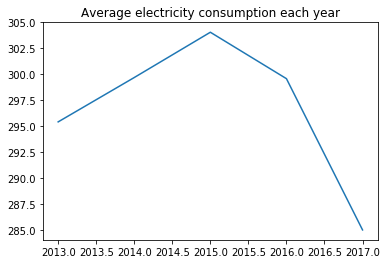

In [33]:
mean_group = data[['year','electricity_consumption']].groupby(['year'])['electricity_consumption'].mean()
plt.plot(mean_group)
plt.title('Average electricity consumption each year')
plt.show()

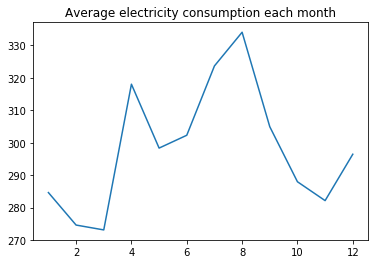

In [219]:
mean_group = data[['month','electricity_consumption']].groupby(['month'])['electricity_consumption'].mean()
plt.plot(mean_group)
plt.title('Average electricity consumption each month')
plt.show()

# <brc>

## Pearson Correlation Plot using the heat map

In [54]:
# creating a list of only numerical values
categorical_data = []
for col, value in data.iteritems():
    if value.dtype == 'object':
        categorical_data.append(col)

        
numerical_data = data.columns.difference(categorical_enquiry)
numerical_data = numerical_data.drop(['ID','var2','time'])

data1 = [go.Heatmap(
        z=data[numerical_data].astype(float).corr().values,
        x=data[numerical_data].columns.values,
        y=data[numerical_data].columns.values,
        colorscale='Viridis',reversescale = False,text = True ,opacity = 1.0)]


layout = go.Layout(title='Pearson Correlation for Enquiry',xaxis = dict(ticks='', nticks=36),yaxis = dict(ticks='' ),
                   width = 800, height = 700,)


fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='labelled-heatmap')

- The correaltion map shows the highest correlation between var1 and temperature  
- pressure and wind speed has the correaltion of 0.1713 
- The pressure and temperature  has the correlation of -0.7239 between them

# ML model 

## Feature Engineering using one hot encoding 

In [278]:
original_cat = data.loc[:,['var2']]
original_cat = pd.get_dummies(original_cat)
original_cat.head(3)


,var2_A,var2_B,var2_C
0,1,0,0
1,1,0,0
2,1,0,0


In [279]:
original_num = data.drop(['electricity_consumption','var2','ID','time'], axis=1) # To remove the target column PerformanceRating 

In [280]:
# Concat the two dataframes together columnwise
original_final = pd.concat([original_num, original_cat], axis=1)
original_final.head(3)

,temperature,var1,pressure,windspeed,year,month,day,var2_A,var2_B,var2_C
0,-11.4,-17.1,1003.0,571.910,2013,7,1,1,0,0
1,-12.1,-19.3,996.0,575.040,2013,7,1,1,0,0
2,-12.9,-20.0,1000.0,578.435,2013,7,1,1,0,0


# <brc>

In [281]:
# Import the train_test_split method
from sklearn.cross_validation import train_test_split


target = data.loc[:,['electricity_consumption']] 


train, test, target_train, target_test = train_test_split(original_final, target,  test_size = 0.3 , random_state = 0);

In [282]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
model_lr = LinearRegression()

In [283]:
import time
start = time.time()

model_lr.fit(train, target_train)

end = time.time()
total = end-start
print("Fitting Time:%s" % total)

Fitting Time:0.016000032424926758


In [284]:
y_predict = model_lr.predict(test)
print("Predictions finished")

Predictions finished


In [285]:
r2_score(target_test, y_predict) # shows the accuracy of the predicted data 

0.22529535190808803

## Feature Ranking via the Random Forest


In [259]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = original_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True),text = original_final.columns.values)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance', hovermode= 'closest', 
    xaxis= dict(ticklen= 5,showgrid=False,zeroline=False,showline=False ),
    yaxis=dict(title= 'Feature Importance Level',showgrid=False,zeroline=False,ticklen= 5,gridwidth= 2),
    showlegend= False)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')